#Data Preprocessing

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
df = pd.read_csv('Churn_Modelling.csv')

In [231]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#Data Exploration

In [232]:
df.shape

(10000, 14)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [234]:
df.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [235]:
df.select_dtypes(include=['int64','float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [236]:
print(len(df.select_dtypes(include='object').columns))

3


In [237]:
print(len(df.select_dtypes(include=['int64','float64']).columns))

11


In [238]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [239]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#Dealing with missing data

In [240]:
df.isnull().values.any()

False

In [241]:
df.isnull().values.sum()

0

#Dealing with Categorical Data

In [242]:
df.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [243]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [244]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

In [245]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [246]:
df.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [247]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [248]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [249]:
df.groupby('Geography').mean()

<ipython-input-249-e205bdccfeb1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Geography').mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [250]:
df.groupby('Gender').mean()

<ipython-input-250-1bea18cda63a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [251]:
#one hot encoding
df = pd.get_dummies(data = df, drop_first = True)

In [252]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


##Countplot

[]

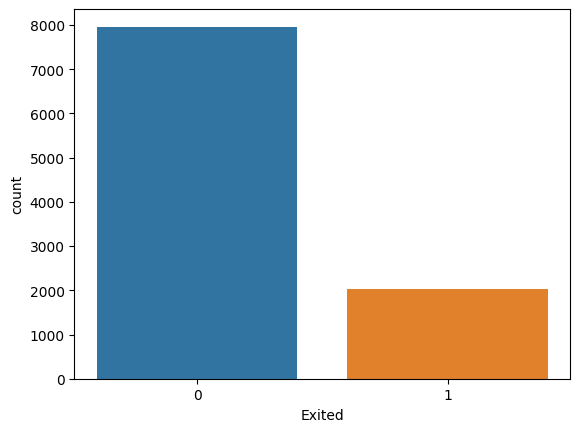

In [253]:
sns.countplot(x=df['Exited'])
plt.plot()

In [254]:
#Customers stayed with bank
(df.Exited==0).sum()

7963

In [255]:
#Customers left the bank
(df.Exited == 1).sum()

2037

## Correlation matrix and heatmap

In [256]:
df2 = df.drop(columns='Exited')

<Axes: title={'center': 'Correlated with Exited'}>

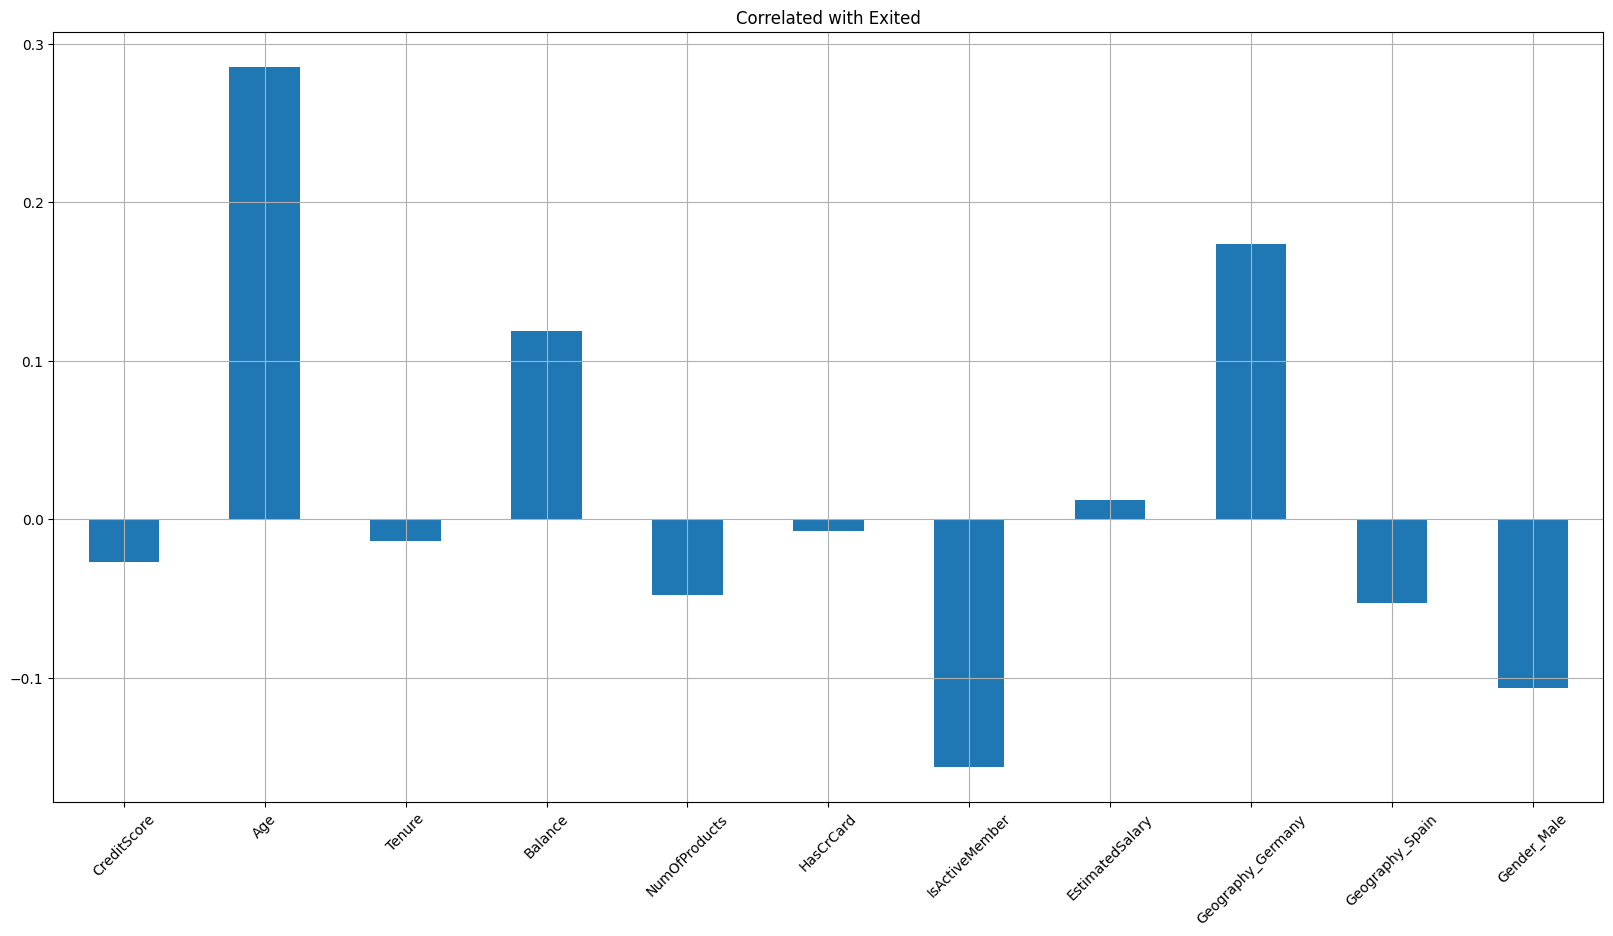

In [257]:
df2.corrwith(df['Exited']).plot.bar(
    figsize=(20,10), title='Correlated with Exited', rot = 45, grid = True
)

In [258]:
corr = df.corr()

<Axes: >

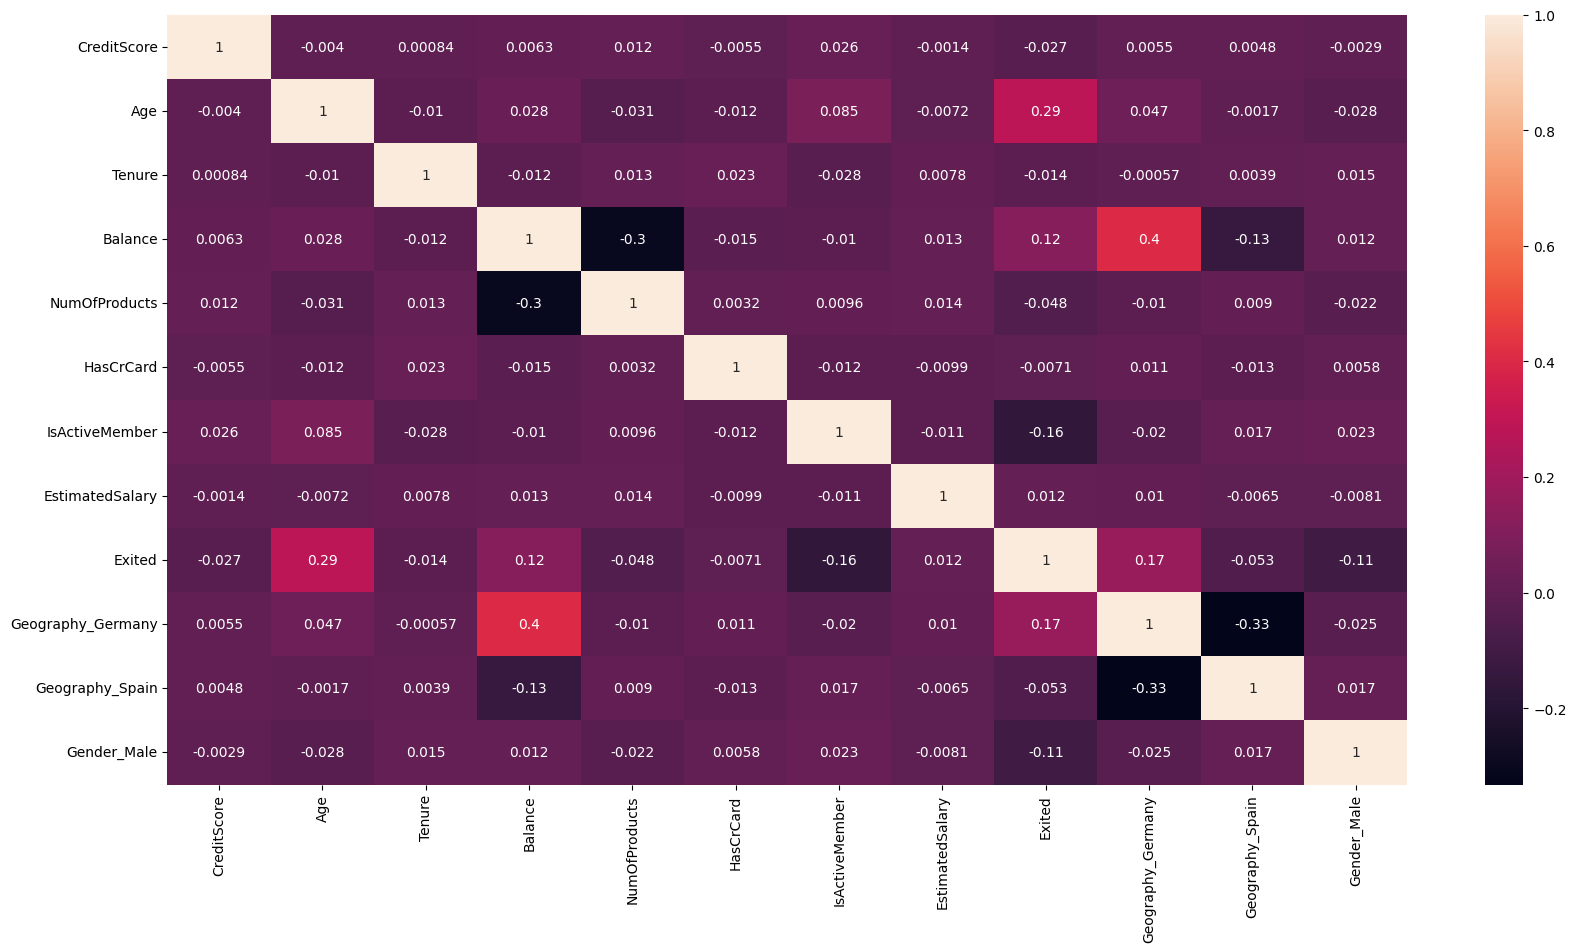

In [259]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True)

#Splitting the dataset

In [260]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [261]:
x = df.drop(['Exited'], axis = 1)

In [262]:
y = df['Exited']

In [263]:
df.shape

(10000, 12)

In [264]:
from sklearn.model_selection  import train_test_split

In [265]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [266]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


#Feature Scaling

In [267]:
from sklearn.preprocessing import StandardScaler

In [268]:
st = StandardScaler()

In [269]:
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

In [270]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [271]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

#Building the model

##Logistic Regression

In [272]:
from sklearn.linear_model import LogisticRegression

In [273]:
lr = LogisticRegression(random_state = 0)

In [274]:
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [275]:
y_pred_lr = lr.predict(x_test)

In [276]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score

In [277]:
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)


In [278]:
results = pd.DataFrame([['Logistic Regression', acc_lr, prec_lr, rec_lr, f1_lr]], columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score'])

In [279]:
results

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.811,0.581818,0.237037,0.336842


In [280]:
from sklearn.model_selection import cross_val_score

In [281]:
accuracy_lr = cross_val_score(estimator = lr, X = x_train, y = y_train, cv = 10)

In [282]:
accuracy_lr

array([0.81   , 0.80375, 0.80875, 0.80875, 0.82125, 0.805  , 0.82125,
       0.79625, 0.79375, 0.815  ])

In [283]:
print("Accuracy of logistic regression is :", accuracy_lr.mean() * 100, "%")
print("Standard_Deviation is :", accuracy_lr.std() * 100, "%")

Accuracy of logistic regression is : 80.8375 %
Standard_Deviation is : 0.8786530885395 %


In [284]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

In [285]:
cm_lr

array([[1526,   69],
       [ 309,   96]])

#Random Forest Classifier

In [286]:
from sklearn.ensemble import RandomForestClassifier

In [287]:
rf = RandomForestClassifier(random_state = 0)

In [288]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [289]:
y_pred_rf = rf.predict(x_test)

In [290]:
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [291]:
results_rf = pd.DataFrame([['Random Forest', acc_rf, prec_rf, rec_rf, f1_rf]], columns=['Model','Accuracy', 'Precision', 'Recall', 'F1 score'])

In [292]:
results_rf

,Model,Accuracy,Precision,Recall,F1 score
0,Random Forest,0.867,0.745583,0.520988,0.613372


In [293]:
results = results.append(results_rf, ignore_index = True)

<ipython-input-293-b17b579ae4e0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_rf, ignore_index = True)


In [294]:
results

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.811,0.581818,0.237037,0.336842
1,Random Forest,0.867,0.745583,0.520988,0.613372


In [295]:
from sklearn.model_selection import cross_val_score

In [296]:
accuracy_rf = cross_val_score(estimator = rf, X=x_train, y=y_train, cv = 10)

In [297]:
print("Accuracy of random forest classifier is :", accuracy_rf.mean() * 100, "%")
print("Standard Deviation is :", accuracy_rf.std() * 100, "%")

Accuracy of random forest classifier is : 85.9625 %
Standard Deviation is : 1.0186541365939672 %


In [298]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [299]:
cm_rf

array([[1523,   72],
       [ 194,  211]])

#XGBoost classifier

In [300]:
from xgboost  import XGBClassifier

In [301]:
xgb = XGBClassifier()

In [302]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [303]:
y_pred_xgb = xgb.predict(x_test)

In [304]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

In [305]:
results_xgb = pd.DataFrame([['XGBClassifier', acc_xgb, prec_xgb, rec_xgb, f1_xgb]], columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score'])

In [306]:
results = results.append(results_xgb, ignore_index = True)

<ipython-input-306-a058f7603276>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_xgb, ignore_index = True)


In [307]:
results

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.8110,0.581818,0.237037,0.336842
1,Random Forest,0.8670,0.745583,0.520988,0.613372
2,XGBClassifier,0.8525,0.670807,0.533333,0.594223


In [308]:
from sklearn.model_selection import cross_val_score

In [309]:
accuracy_xgb = cross_val_score(estimator = xgb, X = x_train, y = y_train, cv = 10)

In [310]:
print("Accuracy of XGBClassifier is :", accuracy_xgb.mean() * 100, "%")
print("Standard Deviation is :", accuracy_xgb.std() * 100,"%")

Accuracy of XGBClassifier is : 85.125 %
Standard Deviation is : 0.9953014618697171 %


In [311]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

In [312]:
cm_xgb

array([[1489,  106],
       [ 189,  216]])

## Hyperparameter tuning


In [313]:
from sklearn.model_selection import RandomizedSearchCV

In [314]:
parameters = {
    'n_estimators' : [100,200,300,400],
    'max_depth' : [10,12,14,16],
    'criterion' : ["gini", "entropy", "log_loss"],
}

In [315]:
parameters

{'n_estimators': [100, 200, 300, 400],
 'max_depth': [10, 12, 14, 16],
 'criterion': ['gini', 'entropy', 'log_loss']}

In [316]:
randomized_search = RandomizedSearchCV(estimator = rf, param_distributions = parameters, n_iter = 10, n_jobs = -1, scoring = 'roc_auc', cv = 10, verbose = 3)

In [317]:
randomized_search.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 12, 14, 16],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='roc_auc', verbose=3)

In [318]:
randomized_search.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=10, n_estimators=300,
                       random_state=0)

In [319]:
randomized_search.best_params_

{'n_estimators': 300, 'max_depth': 10, 'criterion': 'log_loss'}

In [320]:
randomized_search.best_score_

0.8631345547016338

#Final Model (Random forest classifier)

In [321]:
from sklearn.ensemble import RandomForestClassifier

In [322]:
rf_final = RandomForestClassifier(criterion='log_loss', max_depth=10, n_estimators=400,
                       random_state=0)

In [323]:
rf_final.fit(x_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=10, n_estimators=400,
                       random_state=0)

In [324]:
y_pred_final = rf.predict(x_test)

In [325]:
acc_final_rf = accuracy_score(y_test, y_pred_final)
prec_final_rf = precision_score(y_test, y_pred_final)
rec_final_rf = recall_score(y_test, y_pred_final)
f1_final_rf = f1_score(y_test, y_pred_final)

In [326]:
results_final = pd.DataFrame([['RandomForestClassifier final', acc_final_rf, prec_final_rf, rec_final_rf, f1_final_rf]], columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score'])

In [327]:
results = results.append(results_final, ignore_index = True)

<ipython-input-327-e78a664c4463>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_final, ignore_index = True)


In [328]:
results

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.8110,0.581818,0.237037,0.336842
1,Random Forest,0.8670,0.745583,0.520988,0.613372
2,XGBClassifier,0.8525,0.670807,0.533333,0.594223
3,RandomForestClassifier final,0.8670,0.745583,0.520988,0.613372


In [329]:
cm_final = confusion_matrix(y_test, y_pred_final)
cm_final

array([[1523,   72],
       [ 194,  211]])

#Cross Validation

In [330]:
from sklearn.model_selection import cross_val_score

In [331]:
accuracy_final = cross_val_score(estimator = rf_final, X = x_train, y = y_train, cv = 10)

In [332]:
print("Final Accuracy is :", accuracy_final.mean() * 100, "%")
print("Standard Deviation is :", accuracy_final.std() * 100, "%")

Final Accuracy is : 86.25 %
Standard Deviation is : 0.9503288904374095 %


#Prediction observation

In [333]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [334]:
df3 = df.drop('Exited', axis = 1)

In [335]:
df3.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [336]:
obs = df3.iloc[0:1,:].values

In [337]:
rf_final.predict(st.transform(obs))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])